# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

16:50:15 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=750117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=384389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=170509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=819379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=130290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=679417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

16:50:16 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=672547;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=566693;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

16:50:17 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=101001;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=552174;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

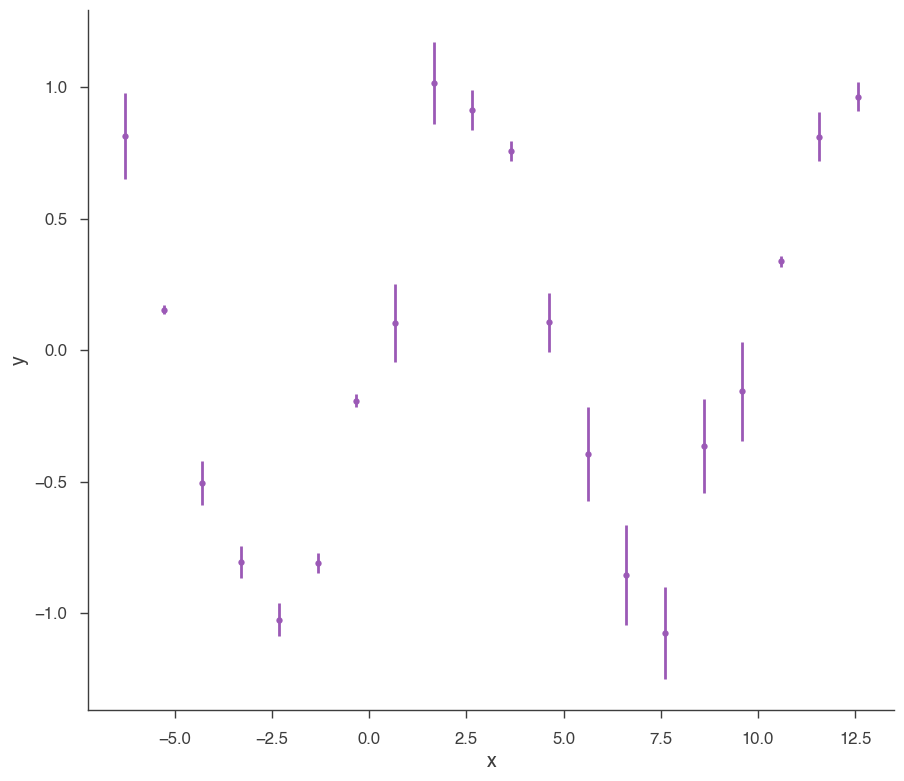

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=106890;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=292273;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

16:50:20 INFO      Mean acceptance fraction: 0.7217                                            ]8;id=139920;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=412191;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=489599;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=894150;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=946311;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=708240;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.20 +0.23) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.966 +/- 0.029) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.868238
total,-10.868238


Values of statistical measures:

,statistical measures
AIC,26.442359
BIC,27.727941
DIC,25.636680
PDIC,1.946254


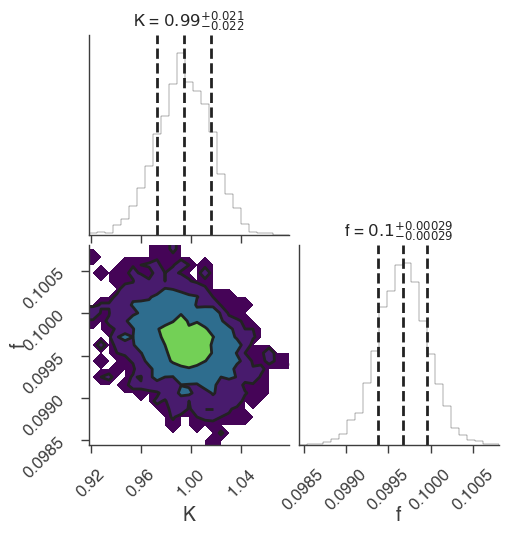

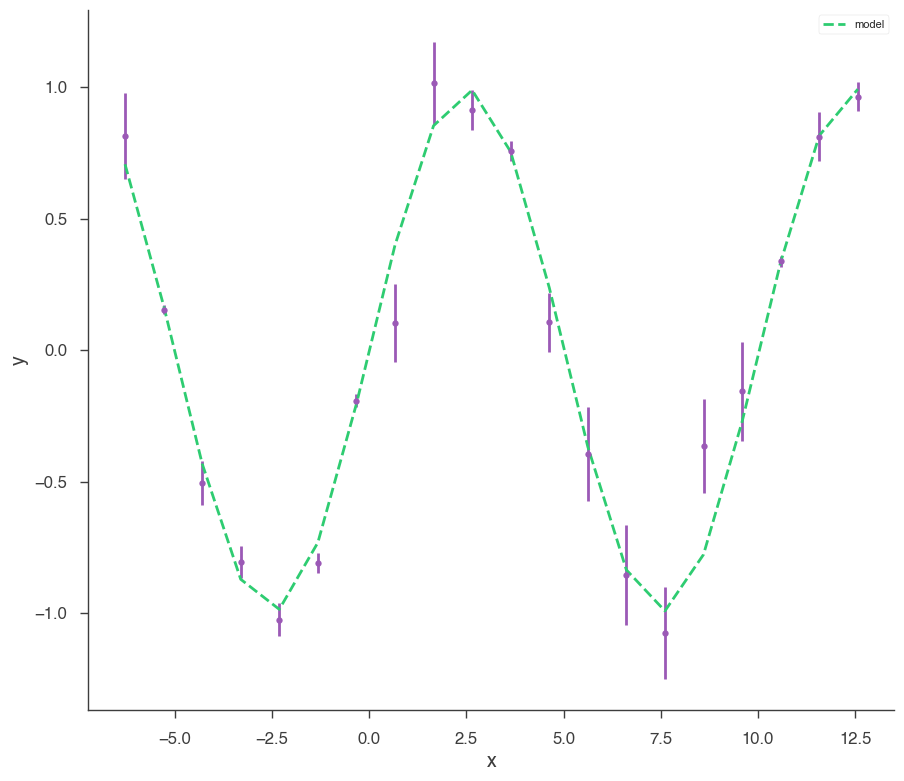

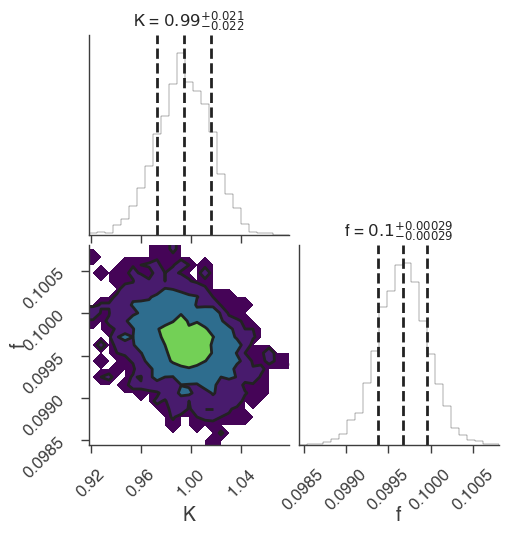

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

16:50:21 INFO      sampler set to multinest                                                ]8;id=387254;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=35961;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -20.378067992226988      +/-  0.14565631944497473     
 Total Likelihood Evaluations:         6233
 Sampling finished. Exiting MultiNest



16:50:22 INFO      fit restored to maximum of posterior                                         ]8;id=577660;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=485533;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=733792;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=717867;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.23 +0.21) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.966 -0.028 +0.032) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.868722
total,-10.868722


Values of statistical measures:

,statistical measures
AIC,26.443326
BIC,27.728908
DIC,25.928558
PDIC,2.095576
log(Z),-8.850082


         INFO      deleting the chain directory chains                                     ]8;id=281783;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=985612;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

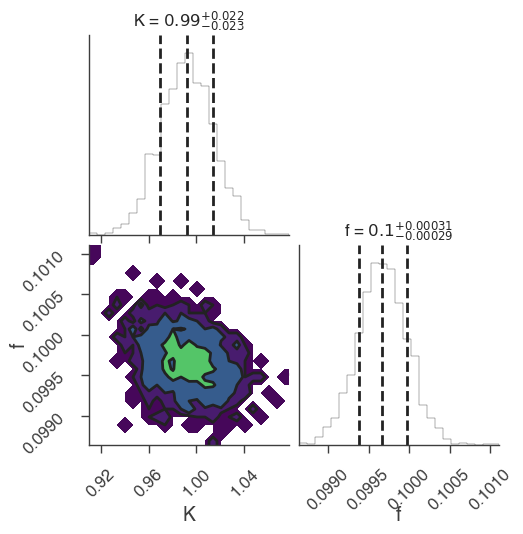

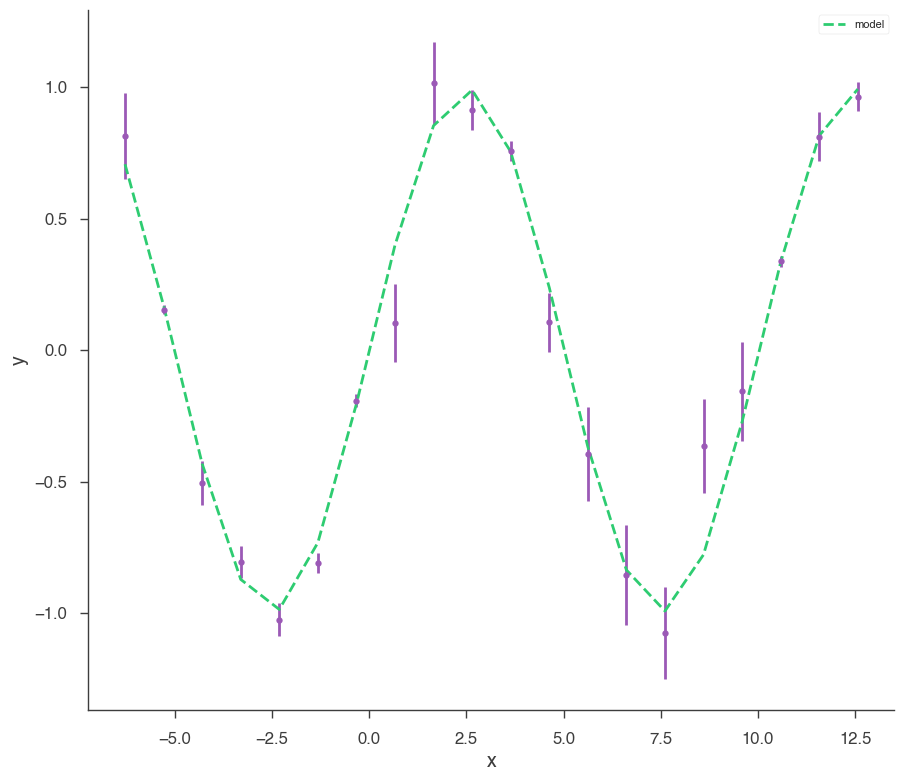

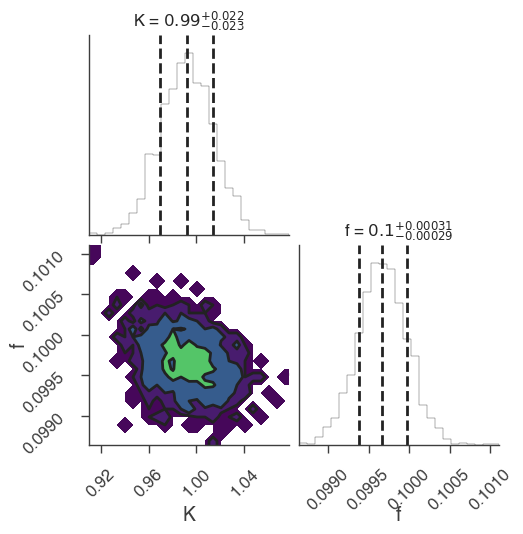

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

16:50:23 INFO      sampler set to dynesty_nested                                           ]8;id=589024;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=240799;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

255it [00:00, 2538.35it/s, bound: 0 | nc: 2 | ncall: 747 | eff(%): 34.137 | loglstar:   -inf < -2611.151 <    inf | logz: -2618.467 +/-  0.135 | dlogz: 2593.237 >  0.409]

509it [00:00, 2030.49it/s, bound: 0 | nc: 2 | ncall: 1360 | eff(%): 37.426 | loglstar:   -inf < -1740.219 <    inf | logz: -1748.008 +/-  0.135 | dlogz: 1730.553 >  0.409]

719it [00:00, 1513.28it/s, bound: 0 | nc: 3 | ncall: 2318 | eff(%): 31.018 | loglstar:   -inf < -1408.391 <    inf | logz: -1415.606 +/-  0.125 | dlogz: 1396.049 >  0.409]

884it [00:00, 1213.79it/s, bound: 0 | nc: 15 | ncall: 3456 | eff(%): 25.579 | loglstar:   -inf < -1206.377 <    inf | logz: -1213.729 +/-  0.130 | dlogz: 1193.735 >  0.409]

1017it [00:00, 1017.20it/s, bound: 0 | nc: 6 | ncall: 4852 | eff(%): 20.960 | loglstar:   -inf < -1000.084 <    inf | logz: -1008.725 +/-  0.141 | dlogz: 989.024 >  0.409] 

1128it [00:01, 868.44it/s, bound: 0 | nc: 33 | ncall: 6561 | eff(%): 17.193 | loglstar:   -inf < -911.158 <    inf | logz: -920.508 +/-  0.149 | dlogz: 908.657 >  0.409]  

1222it [00:01, 652.26it/s, bound: 0 | nc: 15 | ncall: 8348 | eff(%): 14.638 | loglstar:   -inf < -656.974 <    inf | logz: -666.292 +/-  0.149 | dlogz: 653.416 >  0.409]

1297it [00:01, 545.17it/s, bound: 0 | nc: 46 | ncall: 9959 | eff(%): 13.023 | loglstar:   -inf < -511.775 <    inf | logz: -521.118 +/-  0.145 | dlogz: 507.385 >  0.409]

1359it [00:01, 496.31it/s, bound: 0 | nc: 19 | ncall: 11284 | eff(%): 12.044 | loglstar:   -inf < -425.182 <    inf | logz: -434.348 +/-  0.144 | dlogz: 420.302 >  0.409]

1413it [00:01, 432.53it/s, bound: 0 | nc: 52 | ncall: 12916 | eff(%): 10.940 | loglstar:   -inf < -374.984 <    inf | logz: -383.666 +/-  0.141 | dlogz: 369.130 >  0.409]

1459it [00:02, 296.75it/s, bound: 1 | nc: 1 | ncall: 14631 | eff(%):  9.972 | loglstar:   -inf < -327.442 <    inf | logz: -337.045 +/-  0.146 | dlogz: 322.929 >  0.409] 

1695it [00:02, 606.30it/s, bound: 1 | nc: 6 | ncall: 15015 | eff(%): 11.289 | loglstar:   -inf < -199.256 <    inf | logz: -207.722 +/-  0.140 | dlogz: 192.754 >  0.409]

1797it [00:02, 604.65it/s, bound: 2 | nc: 1 | ncall: 15233 | eff(%): 11.797 | loglstar:   -inf < -161.673 <    inf | logz: -170.350 +/-  0.140 | dlogz: 155.113 >  0.409]

2015it [00:02, 891.38it/s, bound: 2 | nc: 8 | ncall: 15554 | eff(%): 12.955 | loglstar:   -inf < -104.625 <    inf | logz: -114.595 +/-  0.145 | dlogz: 98.934 >  0.409] 

2150it [00:02, 843.88it/s, bound: 3 | nc: 1 | ncall: 15834 | eff(%): 13.578 | loglstar:   -inf < -80.566 <    inf | logz: -90.429 +/-  0.148 | dlogz: 74.332 >  0.409]  

2367it [00:02, 1111.16it/s, bound: 3 | nc: 4 | ncall: 16177 | eff(%): 14.632 | loglstar:   -inf < -51.862 <    inf | logz: -61.434 +/-  0.148 | dlogz: 44.703 >  0.409]

2509it [00:03, 982.91it/s, bound: 4 | nc: 1 | ncall: 16467 | eff(%): 15.237 | loglstar:   -inf < -38.226 <    inf | logz: -48.202 +/-  0.148 | dlogz: 31.122 >  0.409] 

2722it [00:03, 1223.34it/s, bound: 4 | nc: 2 | ncall: 16804 | eff(%): 16.199 | loglstar:   -inf < -26.472 <    inf | logz: -35.965 +/-  0.146 | dlogz: 18.285 >  0.409]

2871it [00:03, 1060.95it/s, bound: 5 | nc: 1 | ncall: 17103 | eff(%): 16.787 | loglstar:   -inf < -21.194 <    inf | logz: -30.793 +/-  0.147 | dlogz: 12.771 >  0.409]

3087it [00:03, 1295.92it/s, bound: 5 | nc: 2 | ncall: 17462 | eff(%): 17.678 | loglstar:   -inf < -17.103 <    inf | logz: -26.518 +/-  0.145 | dlogz:  7.942 >  0.409]

3241it [00:03, 1123.73it/s, bound: 6 | nc: 1 | ncall: 17733 | eff(%): 18.277 | loglstar:   -inf < -15.171 <    inf | logz: -24.624 +/-  0.145 | dlogz:  5.662 >  0.409]

3447it [00:03, 1326.42it/s, bound: 6 | nc: 2 | ncall: 18074 | eff(%): 19.072 | loglstar:   -inf < -13.454 <    inf | logz: -22.996 +/-  0.146 | dlogz:  3.542 >  0.409]

3602it [00:03, 1161.85it/s, bound: 7 | nc: 2 | ncall: 18324 | eff(%): 19.657 | loglstar:   -inf < -12.613 <    inf | logz: -22.167 +/-  0.146 | dlogz:  2.391 >  0.409]

3810it [00:04, 1364.78it/s, bound: 7 | nc: 2 | ncall: 18682 | eff(%): 20.394 | loglstar:   -inf < -11.921 <    inf | logz: -21.463 +/-  0.146 | dlogz:  1.368 >  0.409]

3967it [00:04, 1180.08it/s, bound: 8 | nc: 1 | ncall: 18942 | eff(%): 20.943 | loglstar:   -inf < -11.595 <    inf | logz: -21.130 +/-  0.146 | dlogz:  0.885 >  0.409]

4171it [00:04, 1371.26it/s, bound: 8 | nc: 1 | ncall: 19303 | eff(%): 21.608 | loglstar:   -inf < -11.306 <    inf | logz: -20.851 +/-  0.146 | dlogz:  0.499 >  0.409]

4242it [00:04, 939.11it/s, +400 | bound: 9 | nc: 1 | ncall: 19864 | eff(%): 23.849 | loglstar:   -inf < -10.876 <    inf | logz: -20.431 +/-  0.146 | dlogz:  0.001 >  0.409]

16:50:28 INFO      fit restored to maximum of posterior                                         ]8;id=796567;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=964464;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=271095;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=582766;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.22 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.966 -0.028 +0.032) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.868897
total,-10.868897


Values of statistical measures:

,statistical measures
AIC,26.443677
BIC,27.729259
DIC,25.778680
PDIC,2.020885
log(Z),-8.873239


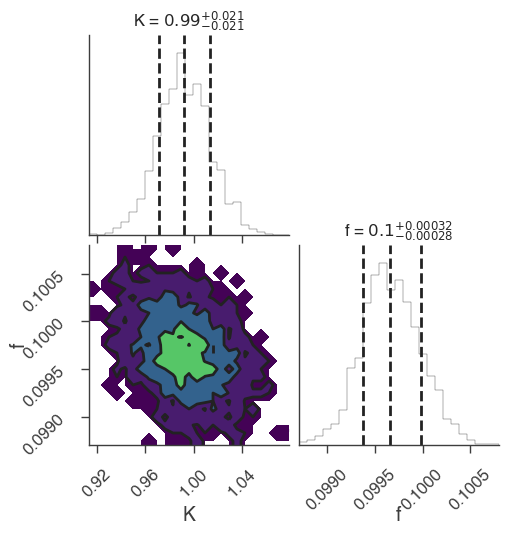

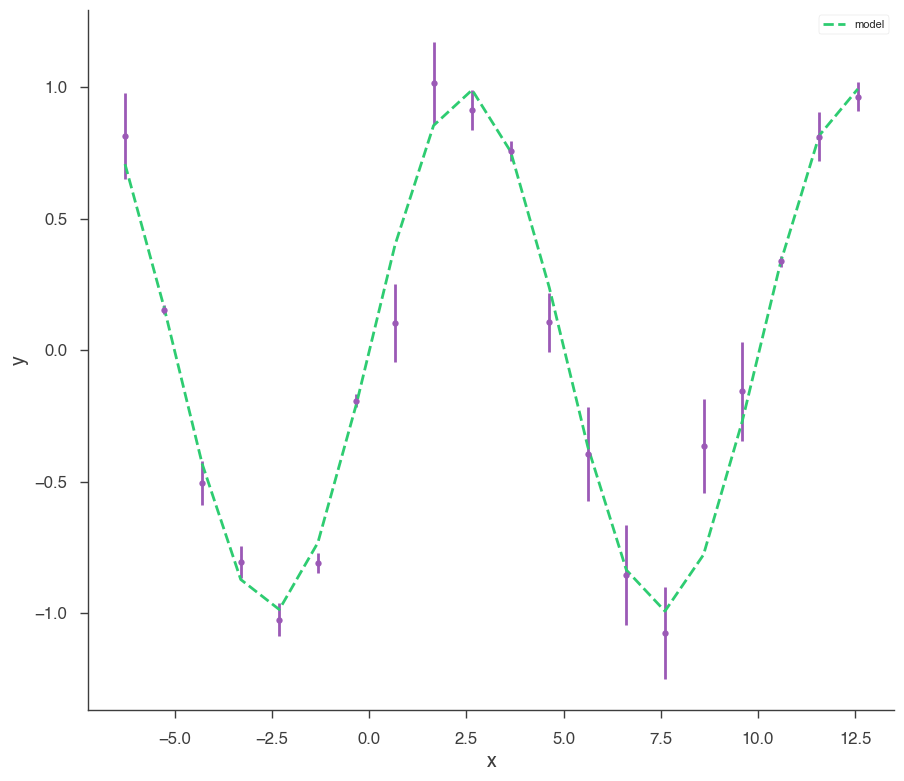

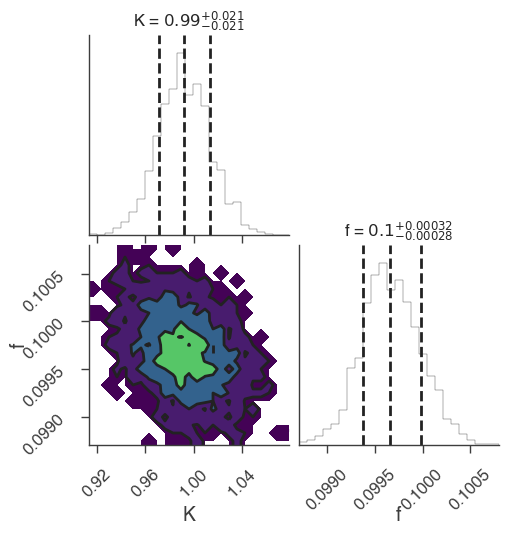

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=913431;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=965681;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

89it [00:00, 882.93it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 98 | eff(%): 14.883 | loglstar:   -inf < -4593.357 <    inf | logz: -4600.443 +/-  0.119 | dlogz: 4603.163 >  0.010]

300it [00:00, 1597.23it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 405 | eff(%): 33.149 | loglstar:   -inf < -2584.557 <    inf | logz: -2592.062 +/-  0.122 | dlogz: 2561.730 >  0.010]

474it [00:00, 1658.50it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 796 | eff(%): 36.574 | loglstar:   -inf < -2066.874 <    inf | logz: -2073.687 +/-  0.113 | dlogz: 2036.999 >  0.010]

662it [00:00, 1742.05it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 1392 | eff(%): 34.989 | loglstar:   -inf < -1722.774 <    inf | logz: -1729.423 +/-  0.113 | dlogz: 1717.579 >  0.010]

837it [00:00, 1520.22it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2126 | eff(%): 31.874 | loglstar:   -inf < -1477.445 <    inf | logz: -1484.681 +/-  0.115 | dlogz: 1472.528 >  0.010]

994it [00:00, 1255.53it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 3085 | eff(%): 27.727 | loglstar:   -inf < -1283.013 <    inf | logz: -1291.132 +/-  0.124 | dlogz: 1279.388 >  0.010]

1129it [00:00, 946.04it/s, batch: 0 | bound: 0 | nc: 32 | ncall: 4531 | eff(%): 22.441 | loglstar:   -inf < -1144.221 <    inf | logz: -1152.625 +/-  0.123 | dlogz: 1140.416 >  0.010]

1239it [00:01, 750.96it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 5808 | eff(%): 19.642 | loglstar:   -inf < -1015.870 <    inf | logz: -1023.879 +/-  0.120 | dlogz: 1010.991 >  0.010] 

1329it [00:01, 700.32it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 7079 | eff(%): 17.535 | loglstar:   -inf < -962.237 <    inf | logz: -970.535 +/-  0.120 | dlogz: 957.421 >  0.010]   

1408it [00:01, 592.37it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 8208 | eff(%): 16.169 | loglstar:   -inf < -877.908 <    inf | logz: -887.591 +/-  0.138 | dlogz: 877.456 >  0.010]

1475it [00:01, 539.19it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 9231 | eff(%): 15.158 | loglstar:   -inf < -746.321 <    inf | logz: -756.164 +/-  0.140 | dlogz: 747.141 >  0.010]

1534it [00:01, 474.45it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 10437 | eff(%): 14.026 | loglstar:   -inf < -632.217 <    inf | logz: -641.917 +/-  0.134 | dlogz: 629.555 >  0.010]

1585it [00:02, 423.32it/s, batch: 0 | bound: 0 | nc: 44 | ncall: 11623 | eff(%): 13.074 | loglstar:   -inf < -552.958 <    inf | logz: -562.190 +/-  0.130 | dlogz: 548.904 >  0.010]

1630it [00:02, 384.97it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 12999 | eff(%): 12.075 | loglstar:   -inf < -483.148 <    inf | logz: -492.360 +/-  0.131 | dlogz: 479.040 >  0.010] 

1670it [00:02, 363.91it/s, batch: 0 | bound: 0 | nc: 62 | ncall: 14130 | eff(%): 11.415 | loglstar:   -inf < -443.171 <    inf | logz: -451.793 +/-  0.129 | dlogz: 437.929 >  0.010]

1707it [00:02, 315.69it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 15142 | eff(%): 10.913 | loglstar:   -inf < -402.577 <    inf | logz: -411.579 +/-  0.131 | dlogz: 397.871 >  0.010]

1740it [00:02, 295.60it/s, batch: 0 | bound: 0 | nc: 29 | ncall: 15934 | eff(%): 10.588 | loglstar:   -inf < -373.483 <    inf | logz: -383.044 +/-  0.130 | dlogz: 369.364 >  0.010]

1771it [00:02, 298.18it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 16630 | eff(%): 10.339 | loglstar:   -inf < -355.343 <    inf | logz: -364.445 +/-  0.125 | dlogz: 350.304 >  0.010]

1801it [00:02, 233.81it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17499 | eff(%): 10.006 | loglstar:   -inf < -331.535 <    inf | logz: -340.823 +/-  0.131 | dlogz: 326.909 >  0.010] 

2017it [00:03, 634.76it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17806 | eff(%): 11.018 | loglstar:   -inf < -231.619 <    inf | logz: -240.590 +/-  0.128 | dlogz: 225.859 >  0.010]

2185it [00:03, 874.01it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18170 | eff(%): 11.703 | loglstar:   -inf < -174.903 <    inf | logz: -183.939 +/-  0.128 | dlogz: 168.773 >  0.010]

2293it [00:03, 754.88it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18338 | eff(%): 12.172 | loglstar:   -inf < -146.449 <    inf | logz: -155.581 +/-  0.128 | dlogz: 140.179 >  0.010]

2485it [00:03, 1013.94it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 18675 | eff(%): 12.960 | loglstar:   -inf < -104.682 <    inf | logz: -113.945 +/-  0.131 | dlogz: 98.111 >  0.010]

2634it [00:03, 872.82it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18991 | eff(%): 13.514 | loglstar:   -inf < -83.290 <    inf | logz: -93.000 +/-  0.132 | dlogz: 76.899 >  0.010]   

2855it [00:03, 1153.93it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19297 | eff(%): 14.421 | loglstar:   -inf < -59.233 <    inf | logz: -68.713 +/-  0.129 | dlogz: 52.074 >  0.010]

3037it [00:03, 1305.94it/s, batch: 0 | bound: 3 | nc: 5 | ncall: 19663 | eff(%): 15.062 | loglstar:   -inf < -44.552 <    inf | logz: -54.036 +/-  0.131 | dlogz: 37.003 >  0.010]

3190it [00:04, 1063.67it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19908 | eff(%): 15.631 | loglstar:   -inf < -35.688 <    inf | logz: -45.443 +/-  0.131 | dlogz: 28.105 >  0.010]

3378it [00:04, 1239.94it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20255 | eff(%): 16.276 | loglstar:   -inf < -27.767 <    inf | logz: -37.622 +/-  0.133 | dlogz: 19.924 >  0.010]

3524it [00:04, 1020.10it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20534 | eff(%): 16.754 | loglstar:   -inf < -23.247 <    inf | logz: -32.949 +/-  0.132 | dlogz: 15.011 >  0.010]

3775it [00:04, 1332.66it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20917 | eff(%): 17.626 | loglstar:   -inf < -18.574 <    inf | logz: -28.137 +/-  0.131 | dlogz:  9.734 >  0.010]

3936it [00:04, 1095.43it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21250 | eff(%): 18.097 | loglstar:   -inf < -16.589 <    inf | logz: -26.100 +/-  0.131 | dlogz:  7.371 >  0.010]

4156it [00:04, 1321.56it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 21549 | eff(%): 18.849 | loglstar:   -inf < -14.541 <    inf | logz: -24.145 +/-  0.131 | dlogz:  4.981 >  0.010]

4321it [00:04, 1396.00it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21873 | eff(%): 19.313 | loglstar:   -inf < -13.569 <    inf | logz: -23.168 +/-  0.131 | dlogz:  3.690 >  0.010]

4483it [00:05, 1123.46it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22124 | eff(%): 19.815 | loglstar:   -inf < -12.816 <    inf | logz: -22.438 +/-  0.131 | dlogz:  2.681 >  0.010]

4678it [00:05, 1299.44it/s, batch: 0 | bound: 7 | nc: 5 | ncall: 22470 | eff(%): 20.366 | loglstar:   -inf < -12.189 <    inf | logz: -21.816 +/-  0.131 | dlogz:  1.781 >  0.010]

4832it [00:05, 1061.57it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22799 | eff(%): 20.739 | loglstar:   -inf < -11.872 <    inf | logz: -21.469 +/-  0.131 | dlogz:  1.271 >  0.010]

5055it [00:05, 1303.31it/s, batch: 0 | bound: 8 | nc: 4 | ncall: 23108 | eff(%): 21.412 | loglstar:   -inf < -11.512 <    inf | logz: -21.125 +/-  0.131 | dlogz:  0.772 >  0.010]

5230it [00:05, 1404.95it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23483 | eff(%): 21.807 | loglstar:   -inf < -11.340 <    inf | logz: -20.945 +/-  0.131 | dlogz:  0.522 >  0.010]

5393it [00:05, 1178.10it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23675 | eff(%): 22.308 | loglstar:   -inf < -11.207 <    inf | logz: -20.825 +/-  0.131 | dlogz:  0.364 >  0.010]

5588it [00:05, 1347.00it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 24058 | eff(%): 22.754 | loglstar:   -inf < -11.101 <    inf | logz: -20.723 +/-  0.131 | dlogz:  0.238 >  0.010]

5743it [00:06, 1131.78it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24327 | eff(%): 23.132 | loglstar:   -inf < -11.038 <    inf | logz: -20.666 +/-  0.131 | dlogz:  0.171 >  0.010]

5962it [00:06, 1360.81it/s, batch: 0 | bound: 10 | nc: 5 | ncall: 24632 | eff(%): 23.723 | loglstar:   -inf < -10.980 <    inf | logz: -20.610 +/-  0.131 | dlogz:  0.108 >  0.010]

6120it [00:06, 1121.39it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25003 | eff(%): 23.997 | loglstar:   -inf < -10.950 <    inf | logz: -20.582 +/-  0.131 | dlogz:  0.077 >  0.010]

6373it [00:06, 1419.16it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 25374 | eff(%): 24.631 | loglstar:   -inf < -10.919 <    inf | logz: -20.553 +/-  0.131 | dlogz:  0.046 >  0.010]

6546it [00:06, 1491.19it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25735 | eff(%): 24.951 | loglstar:   -inf < -10.907 <    inf | logz: -20.540 +/-  0.131 | dlogz:  0.032 >  0.010]

6717it [00:06, 1251.96it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25948 | eff(%): 25.397 | loglstar:   -inf < -10.897 <    inf | logz: -20.530 +/-  0.131 | dlogz:  0.023 >  0.010]

6915it [00:06, 1414.15it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 26294 | eff(%): 25.808 | loglstar:   -inf < -10.890 <    inf | logz: -20.523 +/-  0.131 | dlogz:  0.015 >  0.010]

7077it [00:07, 1150.81it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26573 | eff(%): 26.140 | loglstar:   -inf < -10.886 <    inf | logz: -20.519 +/-  0.131 | dlogz:  0.011 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7629it [00:07, 895.79it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27134 | eff(%): 28.116 | loglstar: -12.738 < -11.535 < -11.429 | logz: -20.508 +/-  0.135 | stop:  1.378]          

7840it [00:08, 1036.59it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27405 | eff(%): 28.011 | loglstar: -12.738 < -12.131 < -11.429 | logz: -20.508 +/-  0.135 | stop:  1.378]

8019it [00:08, 1142.86it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27751 | eff(%): 28.301 | loglstar: -12.738 < -11.742 < -11.429 | logz: -20.508 +/-  0.135 | stop:  1.378]

8175it [00:08, 1005.35it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28006 | eff(%): 28.594 | loglstar: -12.738 < -11.500 < -11.429 | logz: -20.508 +/-  0.135 | stop:  1.378]

8714it [00:08, 1735.04it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 28641 | eff(%): 30.407 | loglstar: -12.738 < -10.886 < -11.429 | logz: -20.508 +/-  0.135 | stop:  1.378]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8967it [00:09, 713.39it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28938 | eff(%): 30.568 | loglstar: -13.231 < -12.250 < -12.733 | logz: -20.506 +/-  0.111 | stop:  1.091] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9338it [00:10, 522.09it/s, batch: 3 | bound: 0 | nc: 1 | ncall: 29335 | eff(%): 31.832 | loglstar: -13.646 < -13.332 < -13.228 | logz: -20.493 +/-  0.104 | stop:  1.009]

9751it [00:10, 759.43it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29773 | eff(%): 32.554 | loglstar: -13.646 < -11.764 < -13.228 | logz: -20.493 +/-  0.104 | stop:  1.009]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9928it [00:11, 889.61it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29953 | eff(%): 33.145 | loglstar: -13.646 < -10.881 < -13.228 | logz: -20.493 +/-  0.104 | stop:  0.859]

16:50:40 INFO      fit restored to maximum of posterior                                         ]8;id=872848;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=287511;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=570005;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=814337;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.23 +0.21) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.967 -0.029 +0.031) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.868258
total,-10.868258


Values of statistical measures:

,statistical measures
AIC,26.442398
BIC,27.727981
DIC,25.775209
PDIC,2.018368
log(Z),-8.903776


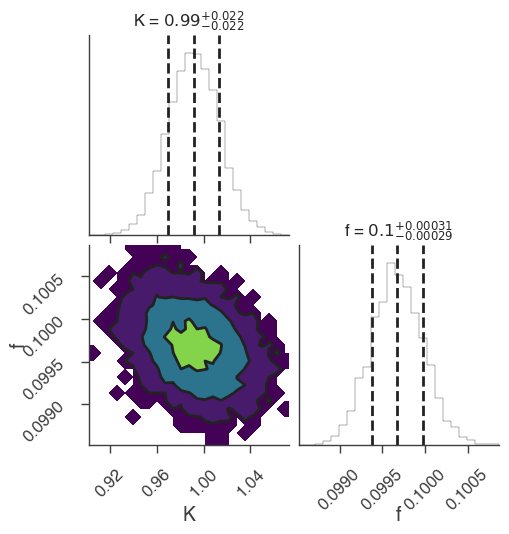

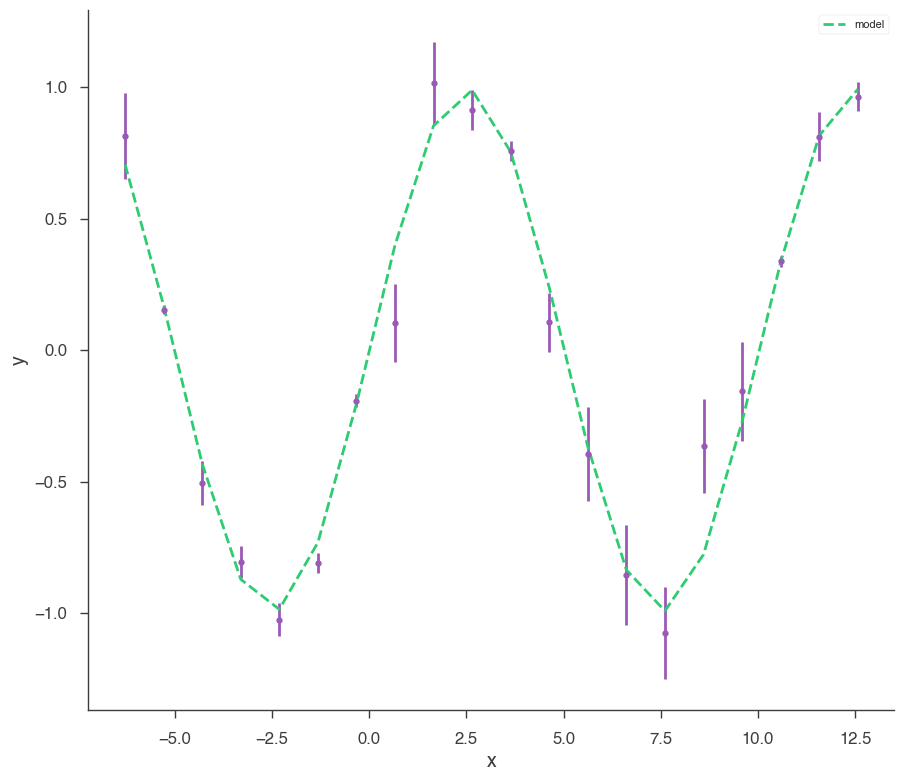

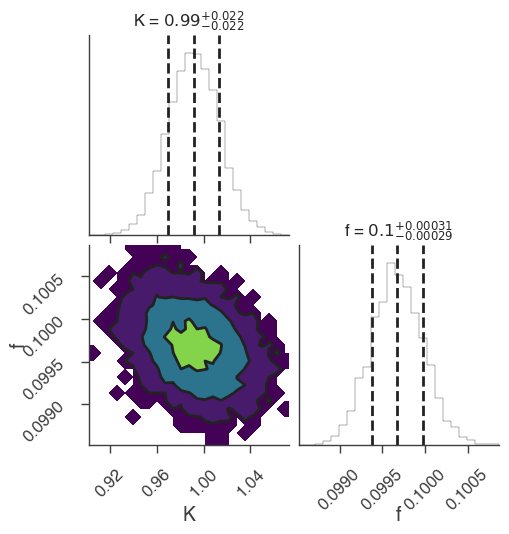

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

16:50:41 INFO      sampler set to zeus                                                     ]8;id=426078;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=463747;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:10, 57.25it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:10, 56.81it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:09, 66.18it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:08, 71.09it/s]

Sampling progress :   6%|▌         | 37/625 [00:00<00:07, 74.86it/s]

Sampling progress :   7%|▋         | 45/625 [00:00<00:07, 73.45it/s]

Sampling progress :   8%|▊         | 53/625 [00:00<00:07, 73.19it/s]

Sampling progress :  10%|▉         | 61/625 [00:00<00:07, 70.85it/s]

Sampling progress :  11%|█         | 69/625 [00:00<00:07, 70.52it/s]

Sampling progress :  12%|█▏        | 77/625 [00:01<00:08, 66.79it/s]

Sampling progress :  14%|█▍        | 86/625 [00:01<00:07, 72.00it/s]

Sampling progress :  15%|█▌        | 94/625 [00:01<00:07, 71.48it/s]

Sampling progress :  16%|█▋        | 103/625 [00:01<00:06, 75.28it/s]

Sampling progress :  18%|█▊        | 111/625 [00:01<00:06, 74.97it/s]

Sampling progress :  19%|█▉        | 119/625 [00:01<00:06, 72.90it/s]

Sampling progress :  20%|██        | 127/625 [00:01<00:06, 71.23it/s]

Sampling progress :  22%|██▏       | 135/625 [00:01<00:06, 70.85it/s]

Sampling progress :  23%|██▎       | 143/625 [00:02<00:06, 71.39it/s]

Sampling progress :  24%|██▍       | 152/625 [00:02<00:06, 75.68it/s]

Sampling progress :  26%|██▌       | 161/625 [00:02<00:05, 78.36it/s]

Sampling progress :  27%|██▋       | 170/625 [00:02<00:05, 80.65it/s]

Sampling progress :  29%|██▊       | 179/625 [00:02<00:05, 81.87it/s]

Sampling progress :  30%|███       | 188/625 [00:02<00:05, 80.70it/s]

Sampling progress :  32%|███▏      | 197/625 [00:02<00:05, 78.55it/s]

Sampling progress :  33%|███▎      | 205/625 [00:02<00:05, 75.46it/s]

Sampling progress :  34%|███▍      | 213/625 [00:02<00:05, 74.16it/s]

Sampling progress :  35%|███▌      | 221/625 [00:02<00:05, 75.65it/s]

Sampling progress :  37%|███▋      | 229/625 [00:03<00:05, 76.06it/s]

Sampling progress :  38%|███▊      | 238/625 [00:03<00:04, 78.39it/s]

Sampling progress :  40%|███▉      | 247/625 [00:03<00:04, 79.63it/s]

Sampling progress :  41%|████      | 255/625 [00:03<00:04, 76.11it/s]

Sampling progress :  42%|████▏     | 263/625 [00:03<00:04, 77.11it/s]

Sampling progress :  44%|████▎     | 272/625 [00:03<00:04, 78.97it/s]

Sampling progress :  45%|████▍     | 280/625 [00:03<00:04, 78.34it/s]

Sampling progress :  46%|████▌     | 288/625 [00:03<00:04, 76.19it/s]

Sampling progress :  48%|████▊     | 297/625 [00:03<00:04, 77.40it/s]

Sampling progress :  49%|████▉     | 305/625 [00:04<00:04, 64.98it/s]

Sampling progress :  50%|█████     | 313/625 [00:04<00:04, 66.78it/s]

Sampling progress :  52%|█████▏    | 322/625 [00:04<00:04, 71.08it/s]

Sampling progress :  53%|█████▎    | 330/625 [00:04<00:04, 72.63it/s]

Sampling progress :  54%|█████▍    | 339/625 [00:04<00:03, 74.44it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:04<00:03, 74.04it/s]

Sampling progress :  57%|█████▋    | 356/625 [00:04<00:03, 75.82it/s]

Sampling progress :  58%|█████▊    | 365/625 [00:04<00:03, 77.66it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:05<00:03, 77.17it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:05<00:03, 78.15it/s]

Sampling progress :  63%|██████▎   | 392/625 [00:05<00:02, 79.59it/s]

Sampling progress :  64%|██████▍   | 401/625 [00:05<00:02, 80.19it/s]

Sampling progress :  66%|██████▌   | 410/625 [00:05<00:02, 79.25it/s]

Sampling progress :  67%|██████▋   | 418/625 [00:05<00:02, 75.93it/s]

Sampling progress :  68%|██████▊   | 426/625 [00:05<00:02, 75.60it/s]

Sampling progress :  69%|██████▉   | 434/625 [00:05<00:02, 74.64it/s]

Sampling progress :  71%|███████   | 442/625 [00:05<00:02, 74.08it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:06<00:02, 74.68it/s]

Sampling progress :  73%|███████▎  | 459/625 [00:06<00:02, 77.27it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:06<00:02, 74.91it/s]

Sampling progress :  76%|███████▌  | 475/625 [00:06<00:02, 73.27it/s]

Sampling progress :  77%|███████▋  | 484/625 [00:06<00:01, 75.98it/s]

Sampling progress :  79%|███████▊  | 492/625 [00:06<00:01, 74.86it/s]

Sampling progress :  80%|████████  | 500/625 [00:06<00:01, 74.65it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:06<00:01, 77.13it/s]

Sampling progress :  83%|████████▎ | 517/625 [00:06<00:01, 76.65it/s]

Sampling progress :  84%|████████▍ | 526/625 [00:07<00:01, 79.31it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:07<00:01, 77.56it/s]

Sampling progress :  87%|████████▋ | 543/625 [00:07<00:01, 79.01it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:07<00:00, 75.03it/s]

Sampling progress :  89%|████████▉ | 559/625 [00:07<00:00, 74.89it/s]

Sampling progress :  91%|█████████ | 567/625 [00:07<00:00, 71.99it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:07<00:00, 74.34it/s]

Sampling progress :  93%|█████████▎| 584/625 [00:07<00:00, 74.14it/s]

Sampling progress :  95%|█████████▍| 592/625 [00:07<00:00, 67.17it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:08<00:00, 64.45it/s]

Sampling progress :  97%|█████████▋| 608/625 [00:08<00:00, 69.65it/s]

Sampling progress :  99%|█████████▊| 616/625 [00:08<00:00, 71.59it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 75.25it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 74.49it/s]

16:50:50 INFO      fit restored to maximum of posterior                                         ]8;id=452021;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=859968;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=202631;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=603261;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 25


Scale Factor: 1.376168


Mean Integrated Autocorrelation Time: 3.19


Effective Sample Size: 3922.88


Number of Log Probability Evaluations: 64838


Effective Samples per Log Probability Evaluation: 0.060503


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.23 +0.21) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.966 -0.029 +0.031) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.868371
total,-10.868371


Values of statistical measures:

,statistical measures
AIC,26.442624
BIC,27.728206
DIC,25.726683
PDIC,1.994676


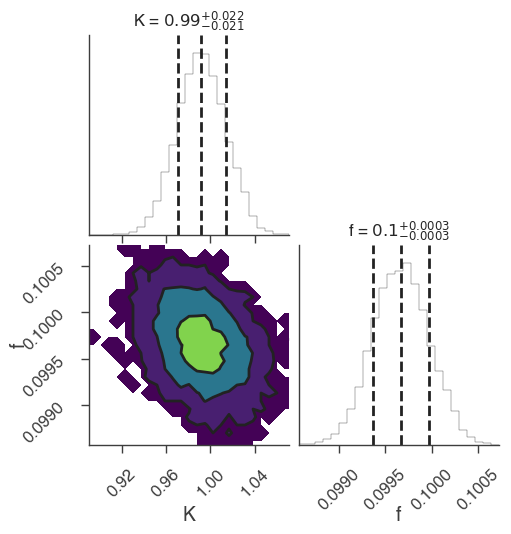

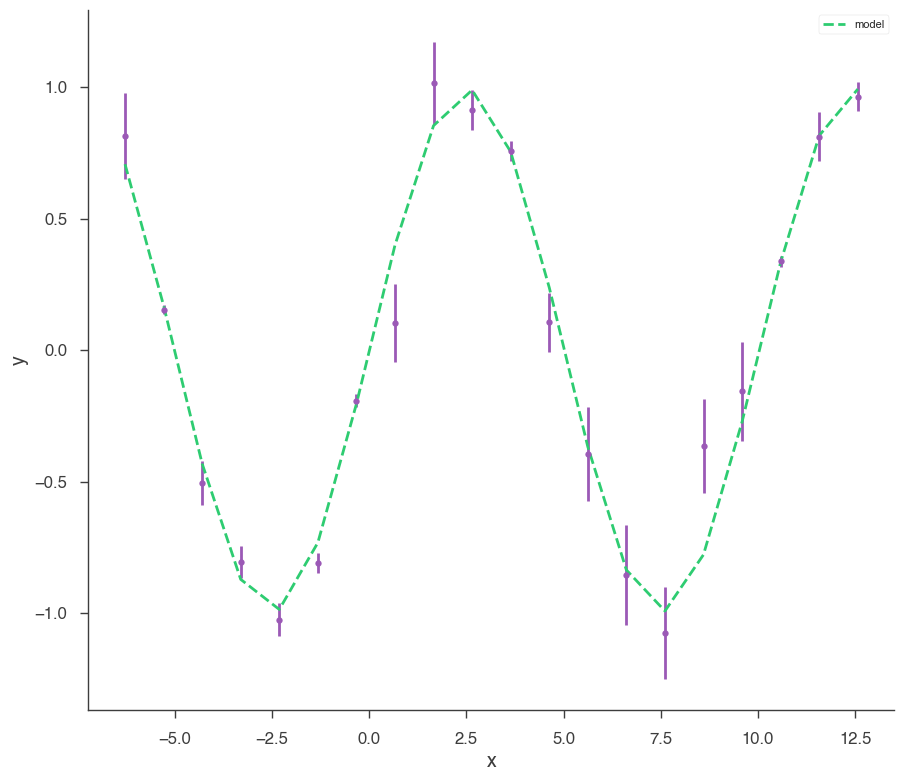

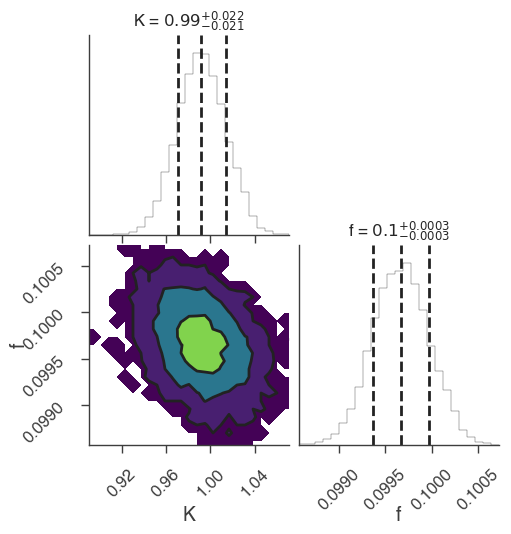

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

         INFO      sampler set to ultranest                                                ]8;id=360814;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=135174;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 8864


[ultranest]   logZ = -20.55 +- 0.1028


[ultranest] Effective samples strategy satisfied (ESS = 976.5, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


16:50:58 INFO      fit restored to maximum of posterior                                         ]8;id=188115;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=819311;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=811569;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=911105;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.23 +0.22) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.966 -0.028 +0.031) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.869009
total,-10.869009


Values of statistical measures:

,statistical measures
AIC,26.443900
BIC,27.729482
DIC,25.744988
PDIC,2.004016
log(Z),-8.920816


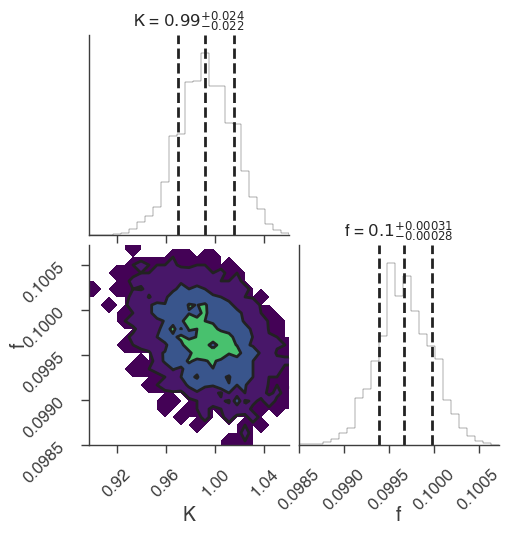

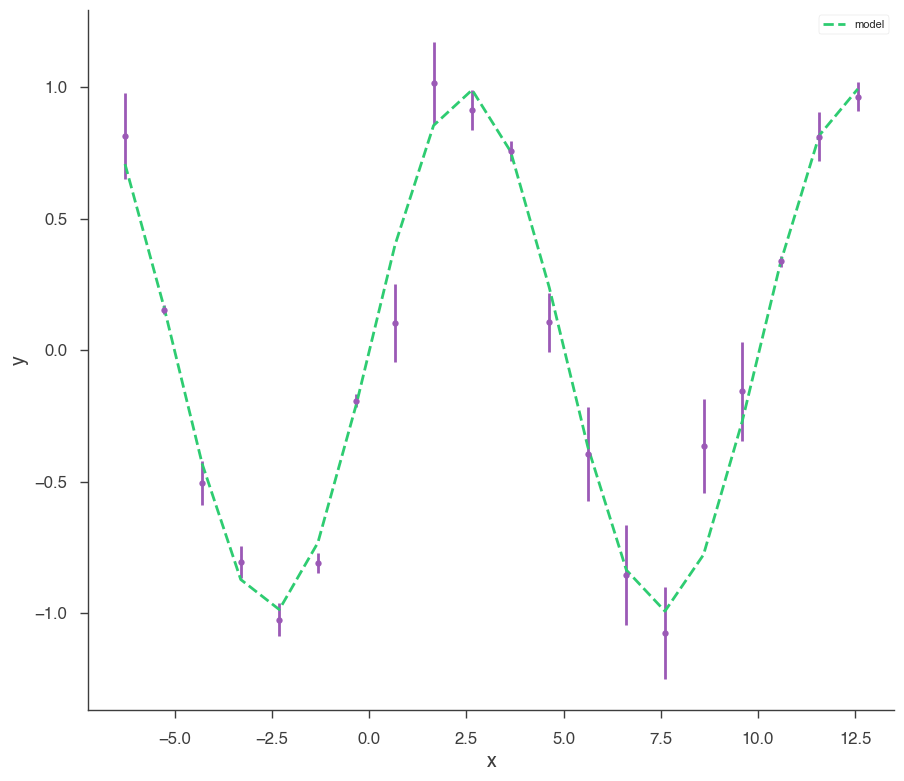

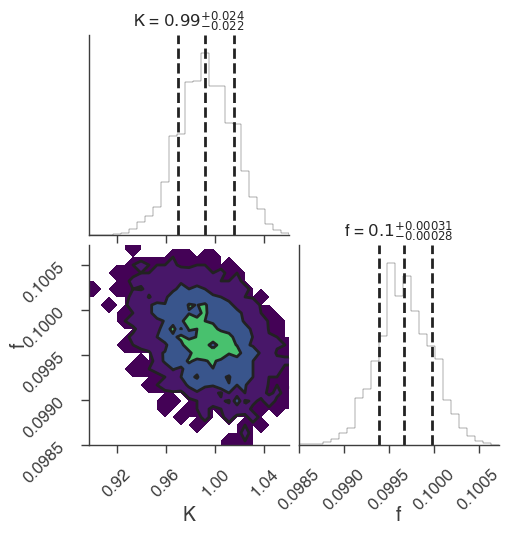

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()